# Import Module

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Import Data

In [32]:
(X_train, y_train), (X_test, y_test) = mnist.load_data(path='mnist.npz')

In [33]:
X_train, X_test = X_train/255.0, X_test/255.0

In [34]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [35]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

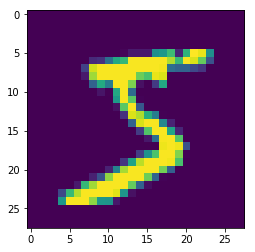

In [36]:
plt.imshow(X_train[0])

In [37]:
def one_hot_encoder(arr):
    d = []
    for a in arr:
        dummy = np.zeros(10)
        dummy[a] = 1
        d.append(dummy)
    return np.array(d)

In [38]:
onehot_y_test = one_hot_encoder(y_test)
onehot_y_test.shape

(10000, 10)

In [39]:
onehot_y_train = one_hot_encoder(y_train)
onehot_y_train.shape

(60000, 10)

# Convolution Neural Network Model

<img src="cnn graph.PNG" width="400" height="200">

input
reshape
convolution layer 1
sampling 1
convolution layer 2
sampling 2
reshape
dnn layer

In [64]:
#parameter
learning_rate = 0.0001
input_shape = [None, 28, 28]
image_shape = [-1, 28, 28, 1]
filter1_shape = [6, 6, 1, 32]
filter2_shape = [6, 6, 32, 64]
pooling_window_size = [1, 2, 2, 1]
n_output = 10
n_epoch = 6
batch_size = 50

In [69]:
#init weight func
def init_weight(shape):
    init_weight = tf.truncated_normal(shape=shape, stddev=0.1)
    return tf.Variable(init_weight)

In [70]:
#init bias func
def init_bias(shape):
    init_bias = tf.constant(0.1,shape=shape)
    return tf.Variable(init_bias)

In [71]:
#input layer
input_x = tf.placeholder(dtype=tf.float32, shape=input_shape)

In [72]:
#reshape the input image to image tensor
image_x = tf.reshape(input_x, shape=image_shape)

In [73]:
#convolution layer 1
w1 = init_weight(filter1_shape)
b1 = init_bias([filter1_shape[3]])
conv2d_1 = tf.nn.conv2d(image_x, w1, strides=[1,1,1,1], padding='SAME')
conv_layer_1 = tf.nn.relu(conv2d_1 + b1)

In [74]:
#pooling layre 1
pooling_1 = tf.nn.max_pool(conv_layer_1, ksize=pooling_window_size, strides=[1, 2, 2, 1], padding='SAME')

In [75]:
#convolution layer 2
w2 = init_weight(filter2_shape)
b2 = init_bias([filter2_shape[3]])
conv2d_2 = tf.nn.conv2d(pooling_1, w2, strides=[1,1,1,1], padding='SAME')
conv_layer_2 = tf.nn.relu(conv2d_2 + b2)

In [76]:
#pooling layre 2
pooling_2 = tf.nn.max_pool(conv_layer_2, ksize=pooling_window_size, strides=[1,2,2,1], padding='SAME')

In [77]:
reshape_input = tf.reshape(pooling_2,shape=[-1, 7*7*64])

In [78]:
#Fully Connected Layer
w3 = init_weight([7*7*64, 1024])
b3 = init_bias([1024])
dnn_layer = tf.nn.relu(tf.matmul(reshape_input, w3) + b3)

In [79]:
#drop out layer
hold_prob = tf.placeholder(tf.float32)
drop_out_layer = tf.nn.dropout(dnn_layer, keep_prob=hold_prob)

In [80]:
#output
w_out = init_weight([1024, n_output])
b_out = init_bias([n_output])
y_output = tf.matmul(drop_out_layer, w_out) + b_out

In [81]:
#y_true
y_true = tf.placeholder(dtype=tf.float32, shape=[None, 10])

In [82]:
#cross entropy
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y_output))

In [83]:
#optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

In [84]:
train = optimizer.minimize(cross_entropy)

In [85]:
#initialize variables
init = tf.global_variables_initializer()

In [86]:
with tf.Session() as sess:
    sess.run(init)
    for e in range(n_epoch):
        print('number of epoch: ', e)
        steps = int(X_train.shape[0]/batch_size)
        for i in range(steps):
            X_batch = X_train[i*batch_size: i*batch_size + batch_size]
            y_batch = onehot_y_train[i*batch_size:i*batch_size + batch_size]
            sess.run(train, feed_dict={input_x:X_batch, hold_prob:0.5, y_true:y_batch})
            #calcuate the accuracy:
            if i % 100 == 0:
                matches = tf.equal(tf.argmax(y_output, 1), tf.argmax(onehot_y_test, 1))
                acc = tf.reduce_mean(tf.cast(matches, tf.float32))
                print('accuracy after {} steps: '.format(i))
                print(sess.run(acc, feed_dict={input_x:X_test, hold_prob:1.0}))

number of epoch:  0
accuracy after 0 steps: 
0.0961
accuracy after 100 steps: 
0.8312
accuracy after 200 steps: 
0.9047
accuracy after 300 steps: 
0.9239
accuracy after 400 steps: 
0.9348
accuracy after 500 steps: 
0.9437
accuracy after 600 steps: 
0.9508
accuracy after 700 steps: 
0.9535
accuracy after 800 steps: 
0.9545
accuracy after 900 steps: 
0.9582
accuracy after 1000 steps: 
0.9592
accuracy after 1100 steps: 
0.9655
number of epoch:  1
accuracy after 0 steps: 
0.96
accuracy after 100 steps: 
0.9679
accuracy after 200 steps: 
0.965
accuracy after 300 steps: 
0.9703
accuracy after 400 steps: 
0.9702
accuracy after 500 steps: 
0.9721
accuracy after 600 steps: 
0.9737
accuracy after 700 steps: 
0.9729
accuracy after 800 steps: 
0.973
accuracy after 900 steps: 
0.9746
accuracy after 1000 steps: 
0.9757
accuracy after 1100 steps: 
0.9775
number of epoch:  2
accuracy after 0 steps: 
0.9744
accuracy after 100 steps: 
0.977
accuracy after 200 steps: 
0.975
accuracy after 300 steps: 
0.9